## Movie Revenue Prediction 

### Objective: Your client is a movie studio and they need to be able to predict movie revenue in order to greenlight the project and assign a budget to it. 
- Most of the data is comprised of categorical variables. 
- While the budget for the movie is known in the dataset, it is often an unknown variable during the greenlighting process. 

In [1]:
# Import necessary modules
import pandas as pd
from pandas import DataFrame
import numpy as np
import matplotlib.pyplot as plt
import datetime

### Section 1: Preprocessing and Exploratory Analysis
- Load Movie_Revenue_Predictions.csv data
- Vizualize Data (EDA)

In [21]:
# Load the dataset
movie_df = DataFrame(pd.read_csv('Movie_Revenue_Predictions.csv'))
movie_df.head(2)

,title,tagline,revenue,budget,genres,homepage,id,keywords,original_language,overview,production_companies,production_countries,release_date,runtime,spoken_languages,status
0,Avatar,Enter the World of Pandora.,2787965087,237000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.avatarmovie.com/,19995,"[{""id"": 1463, ""name"": ""culture clash""}, {""id"":...",en,"In the 22nd century, a paraplegic Marine is di...","[{""name"": ""Ingenious Film Partners"", ""id"": 289...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",12/10/09,162.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso...",Released
1,Pirates of the Caribbean: At World's End,"At the end of the world, the adventure begins.",961000000,300000000,"[{""id"": 12, ""name"": ""Adventure""}, {""id"": 14, ""...",http://disney.go.com/disneypictures/pirates/,285,"[{""id"": 270, ""name"": ""ocean""}, {""id"": 726, ""na...",en,"Captain Barbossa, long believed to be dead, ha...","[{""name"": ""Walt Disney Pictures"", ""id"": 2}, {""...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",5/19/07,169.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released


In [22]:
# Assess dataframe
movie_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4803 entries, 0 to 4802
Data columns (total 16 columns):
title                   4803 non-null object
tagline                 3959 non-null object
revenue                 4803 non-null int64
budget                  4803 non-null int64
genres                  4803 non-null object
homepage                1712 non-null object
id                      4803 non-null int64
keywords                4803 non-null object
original_language       4803 non-null object
overview                4800 non-null object
production_companies    4803 non-null object
production_countries    4803 non-null object
release_date            4802 non-null object
runtime                 4801 non-null float64
spoken_languages        4803 non-null object
status                  4803 non-null object
dtypes: float64(1), int64(3), object(12)
memory usage: 600.5+ KB


In [23]:
movie_df.isnull().sum()

title                      0
tagline                  844
revenue                    0
budget                     0
genres                     0
homepage                3091
id                         0
keywords                   0
original_language          0
overview                   3
production_companies       0
production_countries       0
release_date               1
runtime                    2
spoken_languages           0
status                     0
dtype: int64

**Observations**: There appear to be various columns with either missing or Null data.

## A. Resolution of NaN variables
#### 1. Numerical columns:
   - **runtime** (2 NaN)
       - since there are so few instances, dropping the NaN rows will not interfere with the analysis of movie revenue. 
        
#### 2. Categorical/Object columns:
Filling in NaN categorical values in the remaining columns is a bit tricky since there is no easily-applied statistical method.
   - **homepage** (3091 NaN)
        - 3/4 of the data is missing (3091 of the total 4803), so this column cannot be effectively utilized for this model and should be dropped.
   - **overview** (3 NaN)
        - since there are so few instances, dropping the NaN rows will not interfere with the analysis of movie revenue. 
   - **release_date** (1 NaN)
        - since there are so few instances, dropping the NaN rows will not interfere with the analysis of movie revenue. 
   - **tagline** (844 NaN)
        - while 844 is well under 1/4 of the total data, the tagline for a movie may in fact have a significant impact on movie revenue due to its marketing implications. Therefore, I will attempt to predict the tagline column missing values with random forest, as documented in this source article: https://www.mikulskibartosz.name/fill-missing-values-using-random-forest/. Sense this will result in the conversion of the dataset in to numerical/encoded values, this resolution will be reserved for after all other values have been resolved.
        
## B. Feature Engineering of Values of Columns with Nested Lists

#### 1. Categorical Columns with Nested (possibly JSON) Data:
   - **genres**
   - **keywords**
   - **production_companies**
   - **production_countries**
   - **spoken_languages**

### A. Resolve NaNs, minus applying Random Forest for *tagline* column predictions.

In [24]:
# homepage
print('Homepage: ', movie_df.homepage[0])

# overview
print('Overview: ', movie_df.overview[0])

# release_date
print('Release: ', movie_df.release_date[0], isinstance(movie_df.release_date[0], datetime.date))

# runtime
print('Runtime: ', movie_df.runtime[0])

Homepage:  http://www.avatarmovie.com/
Overview:  In the 22nd century, a paraplegic Marine is dispatched to the moon Pandora on a unique mission, but becomes torn between following orders and protecting an alien civilization.
Release:  12/10/09 False
Runtime:  162.0


1. Fix NaNs in Numerical Columns

In [25]:
# only select rows where overview, runtime, and release_date columns are "not null"
movie_df = movie_df.dropna(subset=['runtime', 'overview', 'release_date'])
len(movie_df)

4799

In [26]:
# Drop unnecessary columns
movie_df = movie_df.drop(columns=['homepage'])
movie_df.head(2)

,title,tagline,revenue,budget,genres,id,keywords,original_language,overview,production_companies,production_countries,release_date,runtime,spoken_languages,status
0,Avatar,Enter the World of Pandora.,2787965087,237000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",19995,"[{""id"": 1463, ""name"": ""culture clash""}, {""id"":...",en,"In the 22nd century, a paraplegic Marine is di...","[{""name"": ""Ingenious Film Partners"", ""id"": 289...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",12/10/09,162.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso...",Released
1,Pirates of the Caribbean: At World's End,"At the end of the world, the adventure begins.",961000000,300000000,"[{""id"": 12, ""name"": ""Adventure""}, {""id"": 14, ""...",285,"[{""id"": 270, ""name"": ""ocean""}, {""id"": 726, ""na...",en,"Captain Barbossa, long believed to be dead, ha...","[{""name"": ""Walt Disney Pictures"", ""id"": 2}, {""...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",5/19/07,169.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released


### B. Feature Engineer Contents of Nested Instance Columns

In [27]:
# genres
print('Genres: ', movie_df.genres[0])
print('  ')
# keywords
print('Keywords: ', movie_df.keywords[0])
print('  ')
# production_companies
print('Production Companies: ', movie_df.production_companies[0])
print('  ')
# production_countries
print('Production Countries: ', movie_df.production_countries[0])
print('  ')
# spoken_languages
print('Spoken Languages: ', movie_df.spoken_languages[0])

Genres:  [{"id": 28, "name": "Action"}, {"id": 12, "name": "Adventure"}, {"id": 14, "name": "Fantasy"}, {"id": 878, "name": "Science Fiction"}]
  
Keywords:  [{"id": 1463, "name": "culture clash"}, {"id": 2964, "name": "future"}, {"id": 3386, "name": "space war"}, {"id": 3388, "name": "space colony"}, {"id": 3679, "name": "society"}, {"id": 3801, "name": "space travel"}, {"id": 9685, "name": "futuristic"}, {"id": 9840, "name": "romance"}, {"id": 9882, "name": "space"}, {"id": 9951, "name": "alien"}, {"id": 10148, "name": "tribe"}, {"id": 10158, "name": "alien planet"}, {"id": 10987, "name": "cgi"}, {"id": 11399, "name": "marine"}, {"id": 13065, "name": "soldier"}, {"id": 14643, "name": "battle"}, {"id": 14720, "name": "love affair"}, {"id": 165431, "name": "anti war"}, {"id": 193554, "name": "power relations"}, {"id": 206690, "name": "mind and soul"}, {"id": 209714, "name": "3d"}]
  
Production Companies:  [{"name": "Ingenious Film Partners", "id": 289}, {"name": "Twentieth Century Fox

#### 1. Organize Nested List of Dictionaries by Movie Title

In [28]:
# Import necessary modules
import ast

In [29]:
# Create function to convert strings to list of dictionaries 
def listdictstr_to_listdictkey(data):
    """Convert Column of Dictionary Strings to Column of Lists of Dictionaries and Return Unique Keys"""
    
    # Define an empty list var
    dict_list = []
    unique_keys = []
    
    # Convert dictionary string to list of lists of dictionaries
    for instance in data:     
        dl = ast.literal_eval(instance)
        dict_list.append(dl)
    
    # Select unique keys
    for lists in dict_list:
        for d in lists:
            for key in d:
                unique_keys.append(key)
    unique_keys = set(unique_keys)
    
    return dict_list, unique_keys

In [41]:
# Create a function that produces a dataframe from the column list of dictionaries
def dictlist_to_dataframe(dict_list, unique_keys):
    """Convert Column of Lists of Dictionaries to one Merged Dataframe"""
    
    # Create column list 
    columns = list(unique_keys)
    new_df = pd.DataFrame(columns=columns)

    for i in range(len(dict_list)):
    
        # Select movie title by matching index in list
        dlist = dict_list[i]
        movie = movie_df.iloc[i, 0]
    
        if dlist == [ ] or dlist == '' or dlist == [np.nan]:
            content = [{'id': 0, 'name': 'Not Specified'}]
            df = pd.DataFrame(content, columns=columns) 
        else: 
            df = pd.DataFrame(dlist, columns=columns) 
        df['title'] = movie
    
        # Merge movie title instances into one combined dataframe
        new_df = new_df.append(df, sort=False, ignore_index=True)
        
    return new_df

In [42]:
# Genres
genres_list, genres_keys = listdictstr_to_listdictkey(movie_df.genres)
print(len(genres_list))

# Genres Dataframe
genres_df = dictlist_to_dataframe(genres_list, genres_keys)
print(len(np.unique(genres_df['title'])))
genres_df.head()       

4799
4796


,name,id,title
0,Action,28,Avatar
1,Adventure,12,Avatar
2,Fantasy,14,Avatar
3,Science Fiction,878,Avatar
4,Adventure,12,Pirates of the Caribbean: At World's End


In [43]:
# Keywords 
keywords_list, keywords_keys = listdictstr_to_listdictkey(movie_df.keywords)
print(len(keywords_list))

# Keywords Dataframe
keywords_df = dictlist_to_dataframe(keywords_list, keywords_keys)
print(len(np.unique(keywords_df['title'])))
keywords_df.head()

4799
4796


,name,id,title
0,culture clash,1463,Avatar
1,future,2964,Avatar
2,space war,3386,Avatar
3,space colony,3388,Avatar
4,society,3679,Avatar


In [44]:
# Production Companies
prod_comp_list, prod_comp_keys = listdictstr_to_listdictkey(movie_df.production_companies)
print(len(prod_comp_list))

# Production Companies Dataframe
prod_companies_df = dictlist_to_dataframe(prod_comp_list, prod_comp_keys)
print(len(np.unique(prod_companies_df['title'])))
prod_companies_df.head()

4799
4796


,name,id,title
0,Ingenious Film Partners,289,Avatar
1,Twentieth Century Fox Film Corporation,306,Avatar
2,Dune Entertainment,444,Avatar
3,Lightstorm Entertainment,574,Avatar
4,Walt Disney Pictures,2,Pirates of the Caribbean: At World's End


In [45]:
# Production Countries
prod_count_list, prod_count_keys = listdictstr_to_listdictkey(movie_df.production_countries)
print(len(prod_count_list))

# Production Countries Dataframe
prod_countries_df = dictlist_to_dataframe(prod_count_list, prod_count_keys)

# Rename columns 
prod_countries_df.columns = ['id', 'name', 'title']
print(len(np.unique(prod_countries_df['title'])))
prod_countries_df.head()

4799
4796


,id,name,title
0,United States of America,US,Avatar
1,United Kingdom,GB,Avatar
2,United States of America,US,Pirates of the Caribbean: At World's End
3,United Kingdom,GB,Spectre
4,United States of America,US,Spectre


In [46]:
# Spoken Languages
spoken_lang_list, spoken_lang_keys = listdictstr_to_listdictkey(movie_df.spoken_languages)
print(len(spoken_lang_list))

# Spoken Languages Dataframe
spoken_lang_df = dictlist_to_dataframe(spoken_lang_list, spoken_lang_keys)

# Rename columns 
spoken_lang_df.columns = ['id', 'name', 'title']
print(len(np.unique(spoken_lang_df['title'])))
spoken_lang_df.head()

4799
4796


,id,name,title
0,English,en,Avatar
1,Español,es,Avatar
2,English,en,Pirates of the Caribbean: At World's End
3,Français,fr,Spectre
4,English,en,Spectre


*Observations*: Despite many modifications, the accuracte of the dictlist_to_dataframe function remains at 4796 out of 4799. Since this is a consistent value, and relatively small inaccuracy, for all columns analyzed, the project will move forward as-is, and will drop all NaN values again.

#### 2. Create feature variables based on Column trends of each Movie Title 

Replace unprocessed columns with new lists in a new movie_df, movie_df_clean

In [47]:
# Make copy of movie_df
movie_df_clean = movie_df.copy()
movie_df_clean.head(1)

,title,tagline,revenue,budget,genres,id,keywords,original_language,overview,production_companies,production_countries,release_date,runtime,spoken_languages,status
0,Avatar,Enter the World of Pandora.,2787965087,237000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",19995,"[{""id"": 1463, ""name"": ""culture clash""}, {""id"":...",en,"In the 22nd century, a paraplegic Marine is di...","[{""name"": ""Ingenious Film Partners"", ""id"": 289...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",12/10/09,162.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso...",Released


In [48]:
# Create a function that replaces column contents with new (cleaned) values
def dataframe_to_instance(df, col_name):
    """Convert Dataframe to List Instance by Movie Title"""
    
    df_column = []
    
    # Convert dataframe rows to lists by genre
    for title in df['title'].unique():
        title_df = df.loc[(df['title'] == title)]
        name_list = list(title_df['name'].unique())
        df_column.append(name_list)
    
    # Change movie_df column value to new list
    movie_df_clean[col_name] = pd.Series(df_column)

In [49]:
# Apply function to all columns in question

# genres
dataframe_to_instance(genres_df, 'genre_clean')

# keywords
dataframe_to_instance(keywords_df, 'keywords_clean')

# production_companies
dataframe_to_instance(prod_companies_df, 'production_companies_clean')

# production_countries
dataframe_to_instance(prod_countries_df, 'production_countries_clean')

# spoken_languages
dataframe_to_instance(spoken_lang_df, 'spoken_languages_clean')

In [50]:
# Drop Unnecessary columns
movie_df_clean = movie_df_clean.drop(columns=['genres', 'keywords', 'production_companies',
                                  'production_countries', 'spoken_languages'])

# Drop NaNs in specific columns
movie_df_clean = movie_df_clean.dropna(subset=['genre_clean', 'keywords_clean', 'production_companies_clean',
                                  'production_countries_clean', 'spoken_languages_clean'])

In [51]:
movie_df_clean.tail()

,title,tagline,revenue,budget,id,original_language,overview,release_date,runtime,status,genre_clean,keywords_clean,production_companies_clean,production_countries_clean,spoken_languages_clean
4791,Tin Can Man,Everything You've Heard is True,0,13,157185,en,Recently dumped by his girlfirend for another ...,1/1/07,84.0,Released,"[Action, Crime, Thriller]","[united states–mexico barrier, legs, arms, pap...",[Columbia Pictures],"[MX, US]",[es]
4792,Cure,Madness. Terror. Murder.,99000,20000,36095,ja,A wave of gruesome murders is sweeping Tokyo. ...,11/6/97,111.0,Released,"[Comedy, Romance]",[Not Specified],[Not Specified],[nan],[nan]
4793,On The Downlow,Two gangs. One secret. One crossroad.,0,0,182291,en,Isaac and Angel are two young Latinos involved...,4/11/04,90.0,Released,"[Comedy, Drama, Romance, TV Movie]","[date, love at first sight, narration, investi...","[Front Street Pictures, Muse Entertainment Ent...",[US],[en]
4794,Sanctuary: Quite a Conundrum,NaN,0,0,286939,en,"It should have been just a normal day of sex, ...",1/20/12,82.0,Released,[Not Specified],[Not Specified],[Not Specified],"[US, CN]",[en]
4795,Bang,Sometimes you've got to break the rules,0,0,124606,en,A young woman in L.A. is having a bad day: she...,9/9/95,98.0,Released,[Documentary],"[obsession, camcorder, crush, dream girl]","[rusty bear entertainment, lucky crow films]",[US],[en]


*Observations*: Looking at the snippet of code above, it appears that some movies have no budget or revenue information (shown as a value of 0 rather than a NaN). Since the purpose of this analysis is to predict movie revenue, these columns are of no use and should be removed.

#### 3. Expand the dataframe so that each item in the list gets its own row

In [ ]:
# Define starting length of movie_df_clean
len(movie_df_clean)

In [55]:
# Source code: https://stackoverflow.com/questions/
#12680754/split-explode-pandas-dataframe-string-entry-to-separate-rows/40449726#40449726

def explode(df, lst_cols, fill_value='', preserve_index=False):
    
    # make sure `lst_cols` is list-alike
    if (lst_cols is not None
        and len(lst_cols) > 0
        and not isinstance(lst_cols, (list, tuple, np.ndarray, pd.Series))):
        lst_cols = [lst_cols]
    
    # all columns except `lst_cols`
    idx_cols = df.columns.difference(lst_cols)
    
    # calculate lengths of lists
    lens = df[lst_cols[0]].str.len()
    
    # preserve original index values    
    idx = np.repeat(df.index.values, lens)
    
    # create "exploded" DF
    res = (pd.DataFrame({
                col:np.repeat(df[col].values, lens)
                for col in idx_cols},
                index=idx)
             .assign(**{col:np.concatenate(df.loc[lens>0, col].values)
                            for col in lst_cols}))
    
    # append those rows that have empty lists
    if (lens == 0).any():
        
        # at least one list in cells is empty
        res = (res.append(df.loc[lens==0, idx_cols], sort=False)
                  .fillna(fill_value))
    
    # revert the original index order
    res = res.sort_index()
    
    # reset index if requested
    if not preserve_index:        
        res = res.reset_index(drop=True)
    return res

In [59]:
# Define columns to be repeated, in order
repeat_cols = ['genre_clean', 'keywords_clean', 'production_companies_clean',
            'production_countries_clean', 'spoken_languages_clean']

for col in repeat_cols:
    movie_df_clean = explode(movie_df_clean, col, fill_value='')

In [61]:
# Define ending length of movie_df_clean
print(len(movie_df_clean))
movie_df_clean.tail()

832802


,budget,genre_clean,id,keywords_clean,original_language,overview,production_companies_clean,production_countries_clean,release_date,revenue,runtime,status,tagline,title,spoken_languages_clean
832797,12000,Drama,692,actress,en,Notorious Baltimore criminal and underground f...,Asylum Films,US,3/12/72,6000000,93.0,Released,An exercise in poor taste.,Pink Flamingos,en
832798,12000,Drama,692,actress,en,Notorious Baltimore criminal and underground f...,FM Entertainment,US,3/12/72,6000000,93.0,Released,An exercise in poor taste.,Pink Flamingos,en
832799,12000,Drama,692,actress,en,Notorious Baltimore criminal and underground f...,Eagle Eye Films Inc.,US,3/12/72,6000000,93.0,Released,An exercise in poor taste.,Pink Flamingos,en
832800,20000,Comedy,36095,Not Specified,ja,A wave of gruesome murders is sweeping Tokyo. ...,Not Specified,nan,11/6/97,99000,111.0,Released,Madness. Terror. Murder.,Cure,nan
832801,20000,Romance,36095,Not Specified,ja,A wave of gruesome murders is sweeping Tokyo. ...,Not Specified,nan,11/6/97,99000,111.0,Released,Madness. Terror. Murder.,Cure,nan


### C.  Further Cleaning of Columns prior to Random Forest Prediction. 

In [ ]:
max(movie_df_clean.revenue), min(movie_df_clean.revenue)

In [ ]:
max(movie_df_clean.budget), min(movie_df_clean.budget)

In [52]:
# Drop rows were revenue = 0
movie_df_clean = movie_df_clean[movie_df_clean.revenue != 0]

# Drop rows were budget = 0
movie_df_clean = movie_df_clean[movie_df_clean.budget != 0]

In [53]:
max(movie_df_clean.revenue), min(movie_df_clean.revenue)

(2787965087, 5)

In [54]:
max(movie_df_clean.budget), min(movie_df_clean.budget)

(380000000, 1)

### C. Apply Random Forest for *tagline* column predictions.

In order to train this model to predict NaN entries, use the columns with taglines as the training data and the NaN entries as the testing data.

In [13]:
# Assess the contents of tagline
print('Tagline: ', movie_df.tagline[0])

Tagline:  Enter the World of Pandora.


In [43]:
# Import necessary modules
from sklearn.ensemble import RandomForestRegressor

In [108]:
# Separate rows with NaN from rows with taglines
train_with_tagline = movie_df[pd.isnull(movie_df['tagline']) == False]
test_with_nan = movie_df[pd.isnull(movie_df['tagline'])]

Encode categorical variables using one-hot encoding (using pandas .get_dummies( ) function)

In [88]:
train_with_tagline.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3959 entries, 0 to 4801
Data columns (total 15 columns):
title                   3959 non-null object
tagline                 3959 non-null object
revenue                 3959 non-null int64
budget                  3959 non-null int64
genres                  3959 non-null object
id                      3959 non-null int64
keywords                3959 non-null object
original_language       3959 non-null object
overview                3959 non-null object
production_companies    3959 non-null object
production_countries    3959 non-null object
release_date            0 non-null object
runtime                 0 non-null object
spoken_languages        3959 non-null object
status                  3959 non-null object
dtypes: int64(3), object(12)
memory usage: 494.9+ KB


In [124]:
# Convert Column value strings to a numeric value
def string_to_numeric(data):
    for i, column in enumerate(list([str(d) for d in data.dtypes])):
        if column == "object":
            data.iloc[:,i] = data.iloc[:,i].fillna(data.iloc[:,i].mode())
            data.iloc[:,i] = data.iloc[:,i].astype("category").cat.codes
        else:
            data.iloc[:,i]  = data.iloc[:,i].fillna(data.iloc[:,i].median())
    return data

In [125]:
# Training data
string_to_numeric(train_with_tagline)
train_with_tagline.head(2)

/anaconda3/lib/python3.7/site-packages/pandas/core/indexing.py:543: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s
/anaconda3/lib/python3.7/site-packages/pandas/core/indexing.py:543: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s
/anaconda3/lib/python3.7/site-packages/pandas/core/indexing.py:543: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/

,title,tagline,revenue,budget,genres,id,keywords,original_language,overview,production_companies,production_countries,release_date,runtime,spoken_languages,status
0,314,732,2787965087,237000000,550,19995,458,7,2087,1157,354,-1,-1,158,1
1,2174,414,961000000,300000000,121,285,1386,7,1358,3020,378,-1,-1,341,1


In [126]:
# Testing Data
string_to_numeric(test_with_nan)
test_with_nan.head(2)

,title,tagline,revenue,budget,genres,id,keywords,original_language,overview,production_companies,production_countries,release_date,runtime,spoken_languages,status
10,589,-1,391081192,270000000,45,1452,515,5,620,121,159,-1,-1,39,1
56,571,-1,343471816,185000000,171,188927,540,5,654,374,159,-1,-1,83,1


Start Prediction with Random Forest Regressor

In [130]:
# Define independent and dependent variables in dataset

# Train
X_train = train_with_tagline.drop('tagline', axis=1)
y_train = train_with_tagline['tagline']

# Test
X_test = test_with_nan.drop('tagline', axis=1)
y_test = test_with_nan['tagline']

In [131]:
# Create a RFR model instance
rfr_tagline = RandomForestRegressor()

# Fit to model
rfr_tagline.fit(X_train, y_train)

/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=None,
           oob_score=False, random_state=None, verbose=0, warm_start=False)

In [132]:
# Show predicted tagline values
generated_taglines = rfr_tagline.predict(X_test)

Cast the generated (int) values of tagline, and replace the missing tagline values with data predicted by the model

In [138]:
# Replace column contents
test_with_nan.loc[:, 'tagline'] = generated_taglines.astype(int)

# Create new movie dataframe with generated taglines
movie_generated_taglines = train_with_tagline.append(test_with_nan)
movie_generated_taglines.head(2)

,title,tagline,revenue,budget,genres,id,keywords,original_language,overview,production_companies,production_countries,release_date,runtime,spoken_languages,status
0,314,732,2787965087,237000000,550,19995,458,7,2087,1157,354,-1,-1,158,1
1,2174,414,961000000,300000000,121,285,1386,7,1358,3020,378,-1,-1,341,1


In [140]:
# Reset index
movie_generated_taglines.reset_index(inplace=True)

In [141]:
# Drop index column
movie_generated_taglines.drop('index',inplace=True,axis=1)
movie_generated_taglines.head(2)

,title,tagline,revenue,budget,genres,id,keywords,original_language,overview,production_companies,production_countries,release_date,runtime,spoken_languages,status
0,314,732,2787965087,237000000,550,19995,458,7,2087,1157,354,-1,-1,158,1
1,2174,414,961000000,300000000,121,285,1386,7,1358,3020,378,-1,-1,341,1


In [143]:
import seaborn as sns

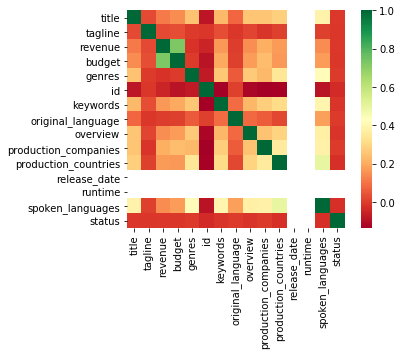

In [144]:
# Create a correlation dataframe
feature_corr = movie_generated_taglines.corr()

# Plot a correlation heatmap
sns.heatmap(feature_corr, square=True, cmap='RdYlGn')